In [197]:
print("KPI 1")

KPI 1


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
file_path1 = "Dialysis - I.csv"
file_path2 = "Dialysis - II.csv"
df1 = pd.read_csv(file_path1)
df2 =pd.read_csv(file_path2)
print(df1.head())

   Provider Number  Network                  Facility Name  \
0            12533        8  DAVITA WALKER COUNTY DIALYSIS   
1            12534        8         BESSEMER KIDNEY CENTER   
2            12525        8                FMC WEST MOBILE   
3            12526        8                  RCG PRINCETON   
4            12527        8                 DCI ENTERPRISE   

          Five Star Date  Five Star  Five Star Data Availability Code  \
0  01/01/2016-12/31/2019        4.0                                 1   
1  01/01/2016-12/31/2019        3.0                                 1   
2  01/01/2016-12/31/2019        5.0                                 1   
3  01/01/2016-12/31/2019        3.0                                 1   
4  01/01/2016-12/31/2019        5.0                                 1   

             Address Line 1 Address Line 2        City State  ...  \
0  260 6TH AVENUE NORTHWEST            NaN      JASPER    AL  ...   
1            975 9TH AVE SW      SUITE 500    BESS

In [209]:
print(df2.head())

                    Facility Name  CMS Certification Number (CCN)  \
0     CHILDRENS HOSPITAL DIALYSIS                           12306   
1                FMC CAPITOL CITY                           12500   
2                GADSDEN DIALYSIS                           12501   
3  TUSCALOOSA UNIVERSITY DIALYSIS                           12502   
4                  PCD MONTGOMERY                           12505   

  Alternate CCN                  Address        City State  Zip Code  Network  \
0         13300   1600 7TH AVENUE SOUTH   BIRMINGHAM    AL     35233        8   
1             -    255 S JACKSON STREET   MONTGOMERY    AL     36104        8   
2             -  409 SOUTH FIRST STREET      GADSDEN    AL     35901        8   
3             -         220 15TH STREET   TUSCALOOSA    AL     35401        8   
4             -      1001 FOREST AVENUE   MONTGOMERY    AL     36106        8   

  VAT Catheter Measure Score  \
0                   No Score   
1                          3   
2 

In [210]:
num_col = df1.shape[1]
print(num_col)

118


In [211]:
num_col = df2.shape[1]
print(num_col)

158


In [212]:
merged_df = pd.merge(df1, df2, on=['Facility Name', 'Network'], how='outer')

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the relevent columns for Df1
patient_columns_df1 = [
    'Number of Dialysis Patients with Hgb data',
    'Number of patients in hypercalcemia summary',
    'Number of patients in Serum phosphorus summary',
    'Number of adult HD patients with KT/V data',
    'Number of patients included in hospitalization summary',
    'Number of Patients included in survival summary',
    # 'Number of patients included in transfusion summary', # Commenté si absent
    'Number of pediatric PD patients with Kt/V data',
]

# Filter the columns which actually exist in the dataset
patient_columns_df1 = [col for col in patient_columns_df1 if col in df1.columns]

# convert relevent columns to numeris, ignoring errors
for col in patient_columns_df1:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')  # Convertit et remplace les erreurs par NaN

# sum of patients df 1
df1['Total Patients'] = df1[patient_columns_df1].sum(axis=1, skipna=True)  # skipna=True ignore les NaN
total_patients_summary_df1 = df1[['Facility Name', 'Total Patients']].groupby('Facility Name').sum().reset_index()

# Sort the summary by total number of patients, from largest to smallest
total_patients_summary_df1 = total_patients_summary_df1.sort_values(by='Total Patients', ascending=False)

#Diplay the summary df 1
print("\nResume Dataset 1:")
print(total_patients_summary_df1)

total_patients_summary_df1.to_excel('total_patients_summary_dataset1.xlsx', index=False)





Resume Dataset 1:
                                  Facility Name  Total Patients
6915                   SATELLITE HEALTHCARE INC         20305.0
6913    SATELLITE HEALTHCARE CENTRAL STATES LLC          9040.0
717                   COMMUNITY DIALYSIS CENTER          6894.0
4076                         EMORY DIALYSIS LLC          6556.0
724                           CONCERTO DIALYSIS          5834.0
...                                         ...             ...
3990                     DIALYZE DIRECT TN, LLC             0.0
7367                            USRC TIFFIN LLC             0.0
875                         DAVITA BALDWIN PARK             0.0
2421  DAVITA MOUNTAIN PARK DIALYSIS CENTER, LLC             0.0
727                      CONCERTO WISCONSIN LLC             0.0

[7504 rows x 2 columns]


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\413391254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_10_hospitals,


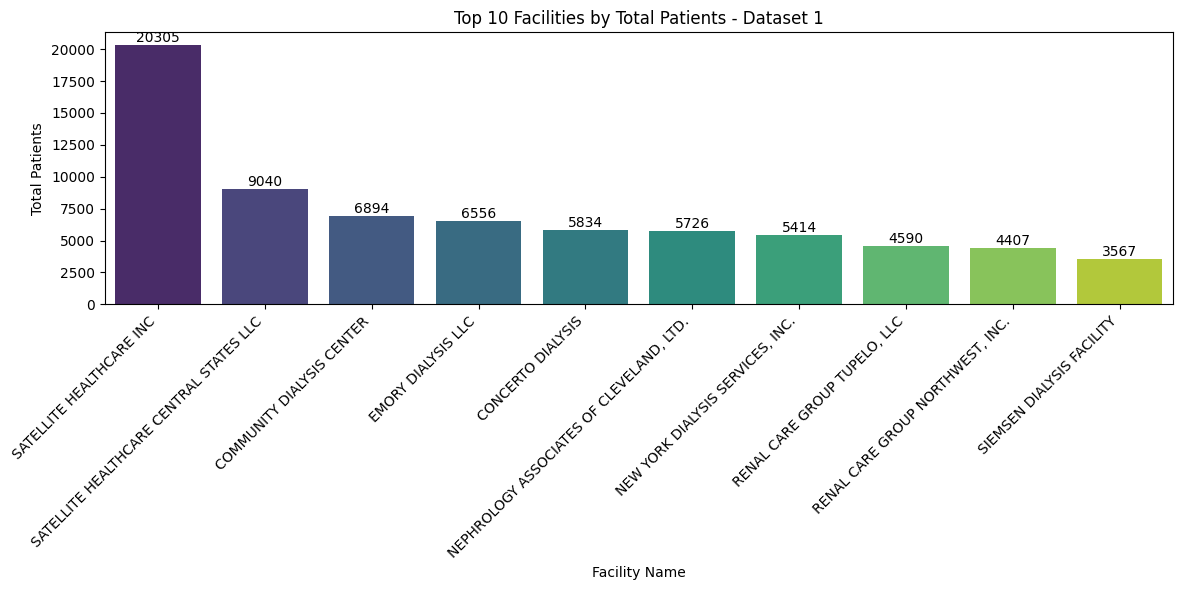

In [214]:
# Visual first 10 hospital
top_10_hospitals = total_patients_summary_df1.sort_values('Total Patients', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_10_hospitals, 
                        x='Facility Name', 
                        y='Total Patients', 
                        palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Facilities by Total Patients - Dataset 1')
plt.ylabel('Total Patients')
plt.xlabel('Facility Name')
plt.tight_layout()
plt.show()

In [225]:
patient_columns_df2 = [
    'Number of Dialysis Patients with Hgb data',
    'Number of patients in hypercalcemia summary',
    'Number of adult HD patients with KT/V data',
    'Number of patients included in hospitalization summary',
    'Number of Patients included in survival summary',
    'Number of pediatric PD patients with Kt/V data',
]


patient_columns_df2 = [col for col in patient_columns_df2 if col in df2.columns]

# Convert relevant columns to numeric, ignoring errors
for col in patient_columns_df2:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # Convertit et remplace les erreurs par NaN

# Sum patients Dataset 2
df2['Total Patients'] = df2[patient_columns_df2].sum(axis=1, skipna=True)

C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\2824144435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_10_hospitals,


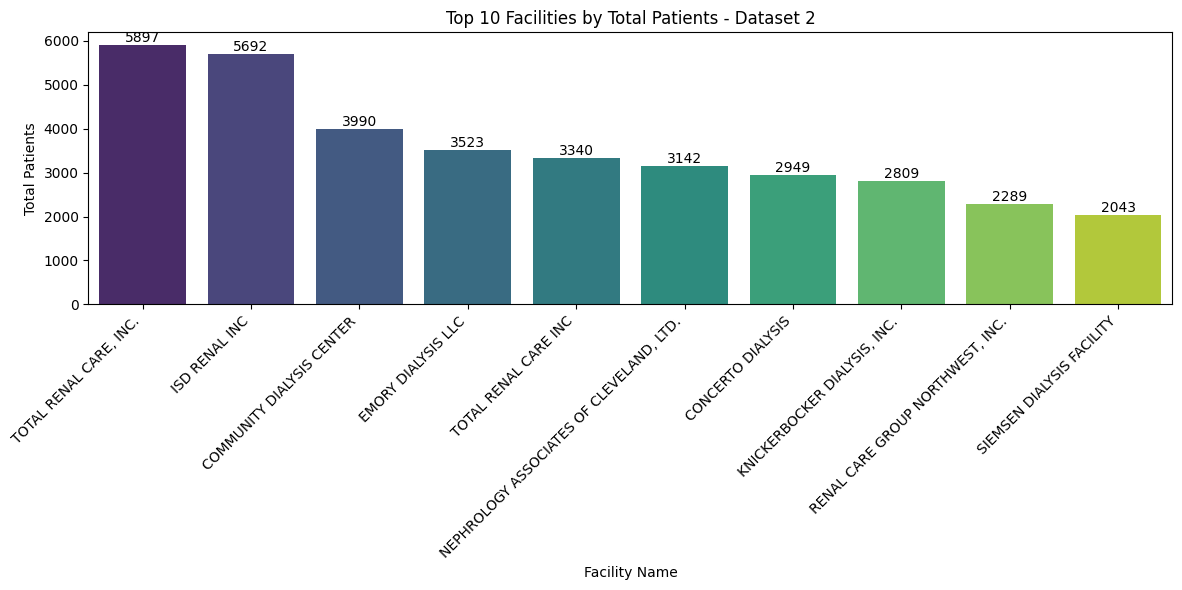

In [227]:

# Visual first  10 hospital
top_10_hospitals = total_patients_summary_df2.sort_values('Total Patients', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_10_hospitals, 
                        x='Facility Name', 
                        y='Total Patients', 
                        palette='viridis')


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Facilities by Total Patients - Dataset 2')
plt.ylabel('Total Patients')
plt.xlabel('Facility Name')
plt.tight_layout()
plt.show()


In [242]:
import pandas as pd


df11 = pd.read_excel('total_patients_summary_dataset1.xlsx')  # Remplacez par le chemin de votre fichier
df22 = pd.read_excel('total_patients_summary_dataset2.xlsx')  # Remplacez par le chemin de votre fichier



# Replace Nan by 0 to do the sum
df11.fillna(0, inplace=True)
df22.fillna(0, inplace=True)

# merge with Facility Name
merged_df = pd.merge(df11, df22, on='Facility Name', how='outer', suffixes=('_df1', '_df2'))

# Remplacer les NaN par 0 pour les colonnes Total Patients après la fusion
merged_df.fillna(0, inplace=True)

# Calculer le total des patients
merged_df['Total Patients'] = merged_df['Total Patients_df1'] + merged_df['Total Patients_df2']

# Créer un DataFrame avec seulement 'Facility Name' et 'Total Patients'
final_df = merged_df[['Facility Name', 'Total Patients']]

# Trier le DataFrame final par 'Total Patients' du plus grand au plus petit
final_df = final_df.sort_values(by='Total Patients', ascending=False)

# Afficher l'aperçu du DataFrame final
print("\nAperçu du DataFrame fusionné final trié:")
print(final_df.head())

# Sauvegarder le DataFrame fusionné dans un nouveau fichier Excel
final_df.to_excel('total_patients_summary_merged_final.xlsx', index=False)



Aperçu du DataFrame fusionné final trié:
                                 Facility Name  Total Patients
9382                  SATELLITE HEALTHCARE INC         20305.0
1118                 COMMUNITY DIALYSIS CENTER         10884.0
5611                        EMORY DIALYSIS LLC         10079.0
9378   SATELLITE HEALTHCARE CENTRAL STATES LLC          9040.0
8470  NEPHROLOGY ASSOCIATES OF CLEVELAND, LTD.          8868.0


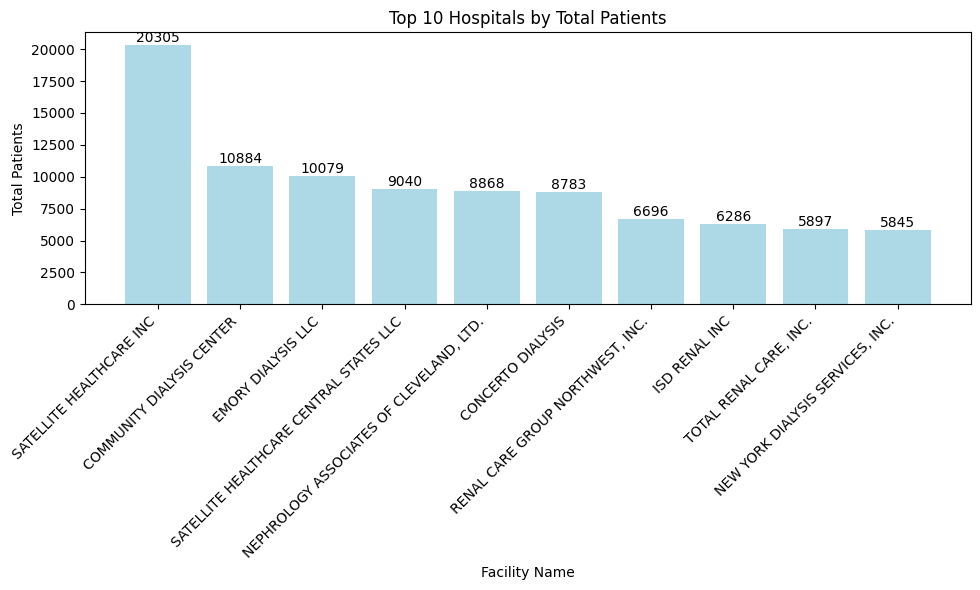

In [243]:

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10['Facility Name'], top_10['Total Patients'], color='lightblue')

# Ajouter les chiffres sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Ajouter les titres et étiquettes
plt.title('Top 10 Hospitals by Total Patients')
plt.xlabel('Facility Name')
plt.ylabel('Total Patients')
plt.xticks(rotation=45, ha='right')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

In [219]:
print("KPI 2")

KPI 2


In [244]:
# Remplacer les NaN par 0 dans les colonnes pertinentes
df11.fillna(0, inplace=True)
df22.fillna(0, inplace=True)
path ='df_merged.xlsx'
merged_df = pd.read_excel(path)
#merged_df = pd.merge(df1, df2, on='Facility Name', how='outer', suffixes=('_df1', '_df2'))

merged_df.fillna(0, inplace=True)
print(merged_df['Total Patients'])


0         320.0
1         151.0
2        1878.0
3          15.0
4        1029.0
          ...  
10388       0.0
10389       0.0
10390       0.0
10391       0.0
10392       0.0
Name: Total Patients, Length: 10393, dtype: float64



Analyse KPI 2 - Dataset 1:
         Type  Total Patients  Mean Patients  Median Patients
0           0            2670       0.000000              0.0
1  Non-Profit             869    1596.471807            703.0
2      Profit            6854     850.895827            698.0


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\3333664256.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=analysis_merged_df, x='Type', y='Total Patients', palette='viridis')


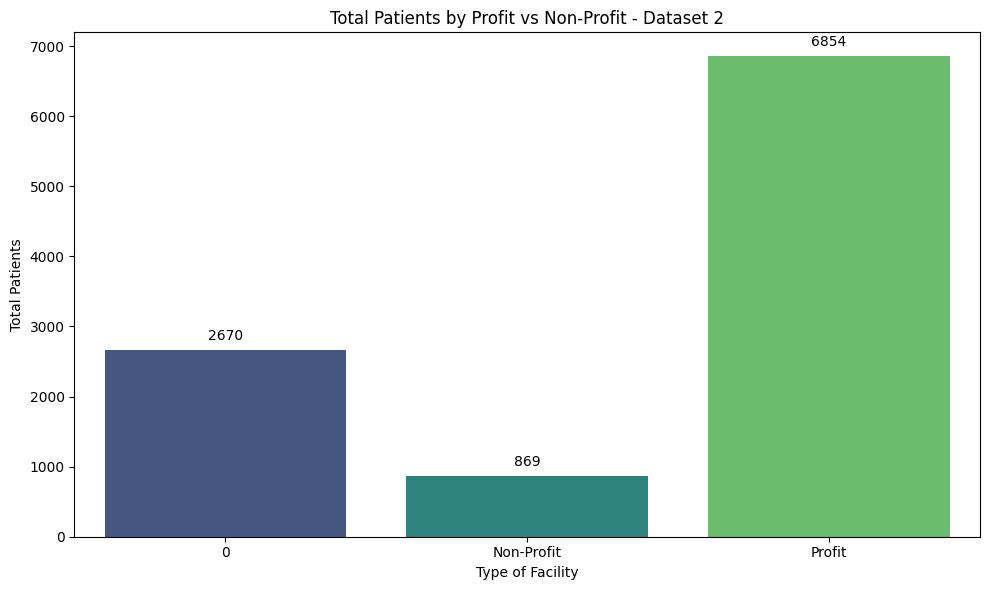

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Analyse du Dataset 1
profit_non_profit_merged_df = merged_df.groupby('Profit or Non-Profit')['Facility Name'].count().reset_index()
profit_non_profit_merged_df.columns = ['Type', 'Total Patients']

# Statistiques supplémentaires
mean_patients_merged_df = merged_df.groupby('Profit or Non-Profit')['Total Patients'].mean().reset_index()
mean_patients_merged_df.columns = ['Type', 'Mean Patients']

median_patients_merged_df = merged_df.groupby('Profit or Non-Profit')['Total Patients'].median().reset_index()
median_patients_merged_df.columns = ['Type', 'Median Patients']

# Fusion des résultats
analysis_merged_df = pd.merge(profit_non_profit_merged_df, mean_patients_merged_df, on='Type')
analysis_merged_df = pd.merge(analysis_merged_df, median_patients_merged_df, on='Type')

# Affichage des résultats
print("\nAnalyse KPI 2 - Dataset 1:")
print(analysis_merged_df)

# Visualisation
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=analysis_merged_df, x='Type', y='Total Patients', palette='viridis')
plt.title('Total Patients by Profit vs Non-Profit - Dataset 2')
plt.ylabel('Total Patients')
plt.xlabel('Type of Facility')

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [246]:
df1_columns = df1.columns.tolist()
print(df_columns)


['Provider Number', 'Network', 'Facility Name', 'Five Star Date', 'Five Star', 'Five Star Data Availability Code', 'Address Line 1', 'Address Line 2', 'City', 'State', 'Zip', 'County', 'Phone Number', 'Profit or Non-Profit', 'Chain Owned', 'Chain Organization', 'Late Shift', '# of Dialysis Stations', 'Offers in-center hemodialysis', 'Offers peritoneal dialysis', 'Offers home hemodialysis training', 'Certification or Recertification Date', 'Claims Date', 'CROWNWeb Date', 'STrR Date', 'Percentage of Medicare patients with Hgb<10 g/dL', 'HGB<10 data availability code', 'Percentage of Medicare patients with Hgb>12 g/dL', 'Hgb > 12 data availability code', 'Number of Dialysis Patients with Hgb data', 'Patient Transfusion data availability Code', 'Patient Transfusion category text', 'Number of patients included in the transfusion summary', 'Percent of Adult HD patients with Kt/V >= 1.2', 'Adult HD Kt/V data availability code', 'Percentage of Adult PD PTS with Kt/V >= 1.7', 'Adult PD Kt/V dat

In [247]:
readmission_rate_merged.to_excel('readmission_rate_merged.xlsx', index=False)



Average readmission rate by type of facility :
         Type  Mean Readmission Rate
0           0               0.000000
1  Non-Profit              21.948216
2      Profit              25.188809


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\3678351323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=readmission_rate_merged, x='Type', y='Mean Readmission Rate', palette='pastel')


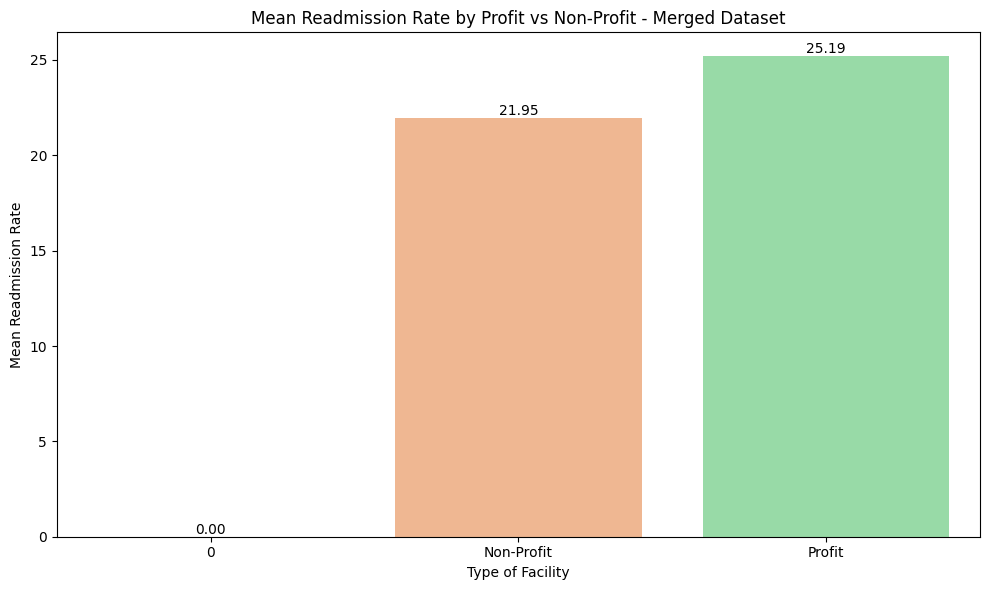

In [248]:
# 2. Analyse des Taux de Réadmission
readmission_rate_merged = merged_df.groupby('Profit or Non-Profit')['Readmission Rate (Facility)'].mean().reset_index()
readmission_rate_merged.columns = ['Type', 'Mean Readmission Rate']

print("\nAverage readmission rate by type of facility :")
print(readmission_rate_merged)

# Visualisation des taux de réadmission
plt.figure(figsize=(10, 6))
sns.barplot(data=readmission_rate_merged, x='Type', y='Mean Readmission Rate', palette='pastel')
for index, value in enumerate(readmission_rate_merged['Mean Readmission Rate']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Affiche la valeur avec deux décimales
plt.title('Mean Readmission Rate by Profit vs Non-Profit - Merged Dataset')
plt.ylabel('Mean Readmission Rate')
plt.xlabel('Type of Facility')
plt.tight_layout()
plt.show()



Taux d'hospitalisation moyen par type de structure :
         Type  Mean Hospitalization Rate
0           0                   0.000000
1  Non-Profit                 155.380271
2      Profit                 177.258529


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\3480467538.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hospitalization_rate_merged, x='Type', y='Mean Hospitalization Rate', palette='coolwarm')


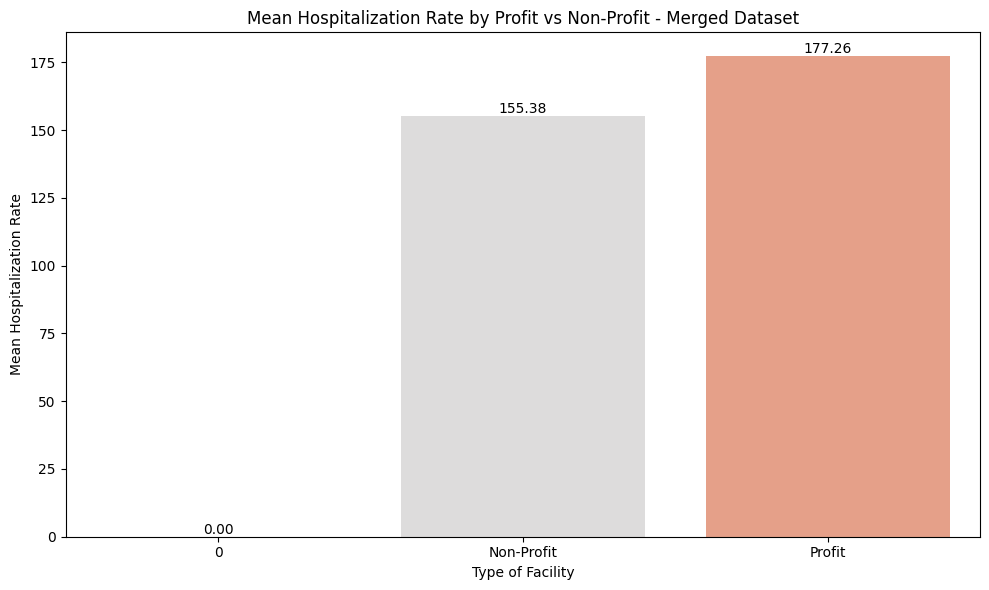

In [115]:
# 3. Hospitalization Rate
hospitalization_rate_merged = merged_df.groupby('Profit or Non-Profit')['Hospitalization Rate (Facility)'].mean().reset_index()
hospitalization_rate_merged.columns = ['Type', 'Mean Hospitalization Rate']

print("\nTaux d'hospitalisation moyen par type de structure :")
print(hospitalization_rate_merged)

# Visual
plt.figure(figsize=(10, 6))
sns.barplot(data=hospitalization_rate_merged, x='Type', y='Mean Hospitalization Rate', palette='coolwarm')
for index, value in enumerate(hospitalization_rate_merged['Mean Hospitalization Rate']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Affiche la valeur avec deux décimales
plt.title('Mean Hospitalization Rate by Profit vs Non-Profit - Merged Dataset')
plt.ylabel('Mean Hospitalization Rate')
plt.xlabel('Type of Facility')
plt.tight_layout()
plt.show()



Taux d'hypercalcémie moyen par type de structure :
         Type  Mean Hypercalcemia Rate
0           0                 0.000000
1  Non-Profit                 2.257829
2      Profit                 1.814253


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\3374836796.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hypercalcemia_rate_merged, x='Type', y='Mean Hypercalcemia Rate', palette='muted')


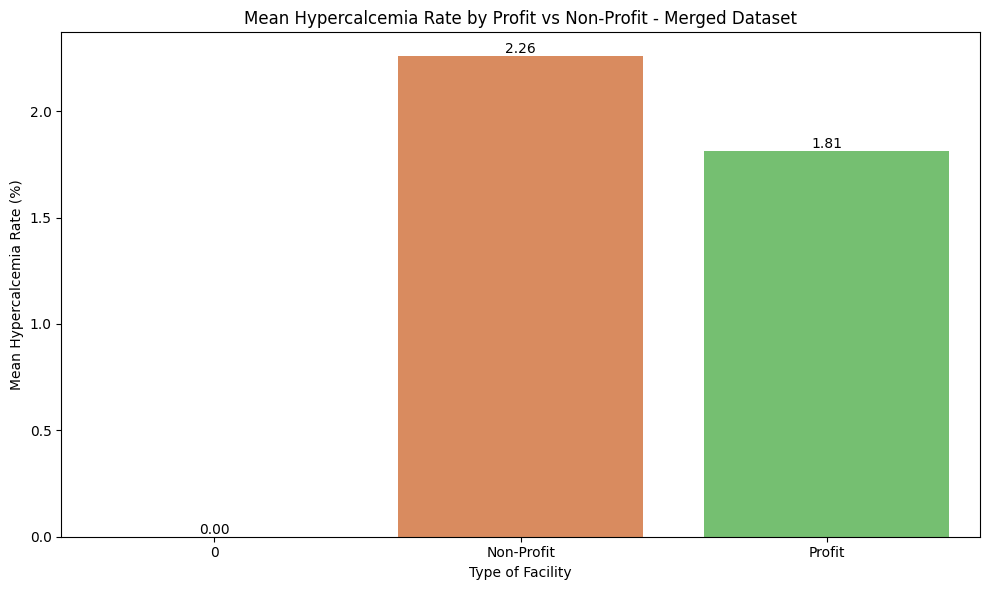

In [116]:
# 4. Analyse du Taux d'Hypercalcémie
hypercalcemia_rate_merged = merged_df.groupby('Profit or Non-Profit')['Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)'].mean().reset_index()
hypercalcemia_rate_merged.columns = ['Type', 'Mean Hypercalcemia Rate']

print("\nMean Hypercalcemia Rate :")
print(hypercalcemia_rate_merged)

# Visualisation des taux d'hypercalcémie
plt.figure(figsize=(10, 6))
sns.barplot(data=hypercalcemia_rate_merged, x='Type', y='Mean Hypercalcemia Rate', palette='muted')
for index, value in enumerate(hypercalcemia_rate_merged['Mean Hypercalcemia Rate']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Affiche la valeur avec deux décimales
plt.title('Mean Hypercalcemia Rate by Profit vs Non-Profit - Merged Dataset')
plt.ylabel('Mean Hypercalcemia Rate (%)')
plt.xlabel('Type of Facility')
plt.tight_layout()
plt.show()



Pourcentage moyen de patients avec Hgb<10 g/dL par type de structure :
         Type  Mean Hgb < 10 Rate
0           0            0.000000
1  Non-Profit           12.489562
2      Profit           17.711180


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\1884030485.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hgb_below_10_rate_merged, x='Type', y='Mean Hgb < 10 Rate', palette='rocket')


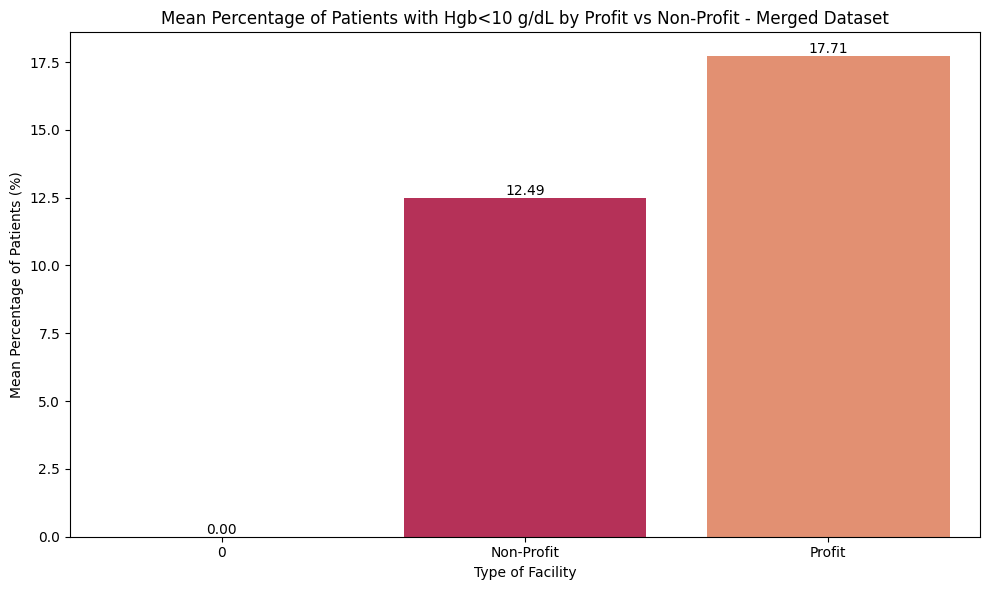

In [117]:
# 5. Analyse du Pourcentage de Patients avec Hgb<10 g/dL
hgb_below_10_rate_merged = merged_df.groupby('Profit or Non-Profit')['Percentage of Medicare patients with Hgb<10 g/dL'].mean().reset_index()
hgb_below_10_rate_merged.columns = ['Type', 'Mean Hgb < 10 Rate']

print("\nPercentage of Medicare patients with Hgb<10 g/dL :")
print(hgb_below_10_rate_merged)

# Visual
plt.figure(figsize=(10, 6))
sns.barplot(data=hgb_below_10_rate_merged, x='Type', y='Mean Hgb < 10 Rate', palette='rocket')
for index, value in enumerate(hgb_below_10_rate_merged['Mean Hgb < 10 Rate']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Affiche la valeur avec deux décimales
plt.title('Mean Percentage of Patients with Hgb<10 g/dL by Profit vs Non-Profit - Merged Dataset')
plt.ylabel('Mean Percentage of Patients (%)')
plt.xlabel('Type of Facility')
plt.tight_layout()
plt.show()



Taux de transfusion moyen par type de structure :
         Type  Mean Transfusion Rate
0           0               0.000000
1  Non-Profit              13.858873
2      Profit              17.142733


C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\718645001.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transfusion_rate_merged, x='Type', y='Mean Transfusion Rate', palette='cividis')


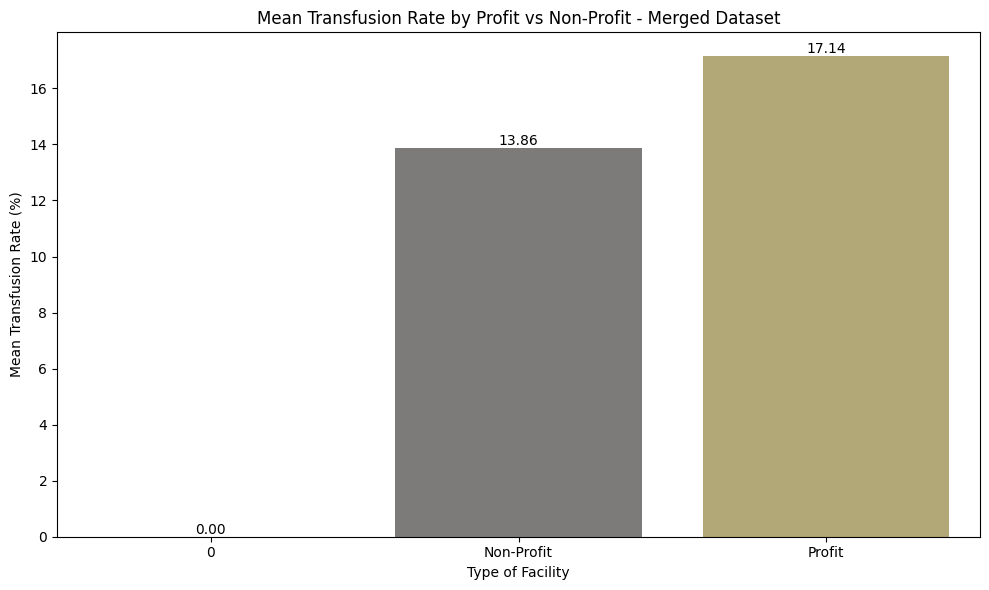

In [118]:
# 6. Analyse du Taux de Transfusion
transfusion_rate_merged = merged_df.groupby('Profit or Non-Profit')['Transfusion Rate (Facility)'].mean().reset_index()
transfusion_rate_merged.columns = ['Type', 'Mean Transfusion Rate']

print("\nTransfusion Rate  :")
print(transfusion_rate_merged)

# Visualisation des taux de transfusion
plt.figure(figsize=(10, 6))
sns.barplot(data=transfusion_rate_merged, x='Type', y='Mean Transfusion Rate', palette='cividis')
for index, value in enumerate(transfusion_rate_merged['Mean Transfusion Rate']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Affiche la valeur avec deux décimales
plt.title('Mean Transfusion Rate by Profit vs Non-Profit - Merged Dataset')
plt.ylabel('Mean Transfusion Rate (%)')
plt.xlabel('Type of Facility')
plt.tight_layout()
plt.show()


In [198]:
print("kpi 3")

kpi 3


In [148]:
# Check the unique values in 'Chain Owned'
print("Unique values in 'Chain Owned':", merged_df['Chain Owned'].unique())

# Display non-chain organizations
non_chain_organizations = merged_df[merged_df['Chain Owned'] == 'No']
print("Sample Non-Chain Organizations:")
print(non_chain_organizations[['Facility Name', 'Total Performance Score']].head(10))

# Count missing scores
no_score_non_chain_count = non_chain_organizations[non_chain_organizations['Total Performance Score'].isnull()].shape[0]
print(f"Non-Chain Organizations with No Score: {no_score_non_chain_count}")

# Display the graph only if data exists
if no_score_non_chain_count > 0:
    plt.figure(figsize=(8, 5))
    # Code for the graph here...
else:
    print("No non-chain organizations without a score to display.")


Unique values in 'Chain Owned': ['No' 0 'Yes']
Sample Non-Chain Organizations:
                                         Facility Name Total Performance Score
0               032302 MARICOPA MEDICAL CTR - DIALYSIS                      78
1    032314 PHOENIX CHILDRENS HOSPITAL- DIALYSIS CE...                      62
2                      032315 GILA RIVER DIALYSIS EAST                      76
4    032316 BANNER UNIVERSITY MEDICAL CENTER PEDIAT...                       0
41                          032551 MESA DIALYSIS (DSI)                      61
63                 032583 SOUTH PHOENIX DIALYSIS (DSI)                      43
69             032596 NORTHEAST PHOENIX DIALYSIS (DSI)                      60
77                      032608 AVONDALE DIALYSIS (DSI)                      78
126                    033503 GILA RIVER DIALYSIS WEST                      79
127    033504 GLENDALE FAMILY HEALTH CENTER - DIALYSIS                      89
No score in Non-Chain Organizations: 0
Aucune organi

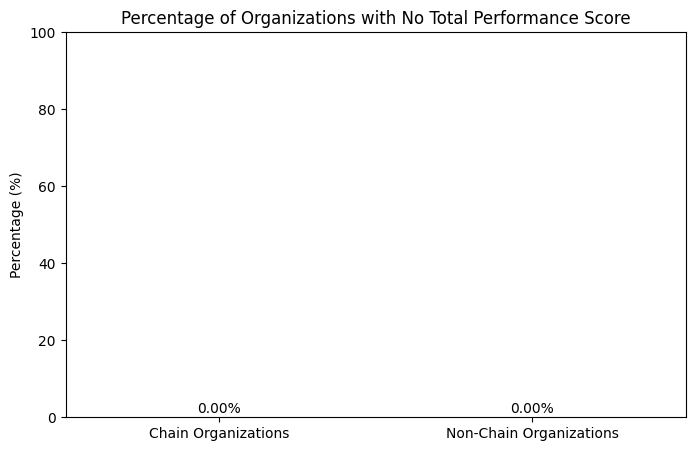

Percentage of Chain Organizations without a Total Performance Score: 0.00%
Percentage of Non-Chain Organizations without a Total Performance Score: 0.00%


In [134]:
import pandas as pd
import matplotlib.pyplot as plt



# 1. Filtrer les organisations de chaîne
chain_organizations = merged_df[merged_df['Chain Owned'] == 'Yes']
non_chain_organizations = merged_df[merged_df['Chain Owned'] == 'No']

# 2. Compter les organisations de chaîne sans score de performance total
no_score_chain_count = chain_organizations[chain_organizations['Total Performance Score'].isnull()].shape[0]
total_chain_count = chain_organizations.shape[0]

# 3. Compter les organisations non de chaîne sans score
no_score_non_chain_count = non_chain_organizations[non_chain_organizations['Total Performance Score'].isnull()].shape[0]
total_non_chain_count = non_chain_organizations.shape[0]

# 4. Calculer les pourcentages
chain_no_score_percentage = (no_score_chain_count / total_chain_count * 100) if total_chain_count > 0 else 0
non_chain_no_score_percentage = (no_score_non_chain_count / total_non_chain_count * 100) if total_non_chain_count > 0 else 0

# 5. Visualiser les résultats
categories = ['Chain Organizations', 'Non-Chain Organizations']
percentages = [chain_no_score_percentage, non_chain_no_score_percentage]

plt.figure(figsize=(8, 5))
plt.bar(categories, percentages, color=['blue', 'orange'])
plt.title('Percentage of Organizations with No Total Performance Score')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Afficher les valeurs sur les barres
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

# 6. Impression des résultats
print(f"Percentage of Chain Organizations without a Total Performance Score: {chain_no_score_percentage:.2f}%")
print(f"Percentage of Non-Chain Organizations without a Total Performance Score: {non_chain_no_score_percentage:.2f}%")


In [149]:
# Compter les scores manquants pour les organisations chain
chain_organizations = merged_df[merged_df['Chain Owned'] == 'Yes']
no_score_chain_count = chain_organizations[chain_organizations['Total Performance Score'].isnull()].shape[0]
print(f"No score in Chain Organizations: {no_score_chain_count}")



No score in Chain Organizations: 0


In [ ]:
print("kpi 4")

In [152]:
# Statistiques de base pour le nombre de stations de dialyse
dialysis_station_stats = merged_df['# of Dialysis Stations'].describe()
print(dialysis_station_stats)


count    11408.000000
mean        12.833275
std         10.651335
min          0.000000
25%          0.000000
50%         13.000000
75%         20.000000
max         80.000000
Name: # of Dialysis Stations, dtype: float64


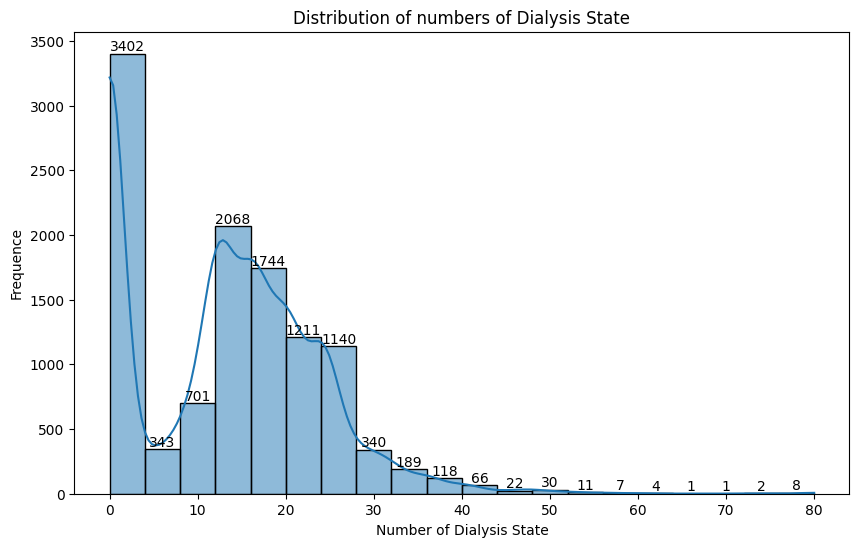

In [192]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['# of Dialysis Stations'].dropna(), bins=20, kde=True)
plt.title('Distribution of numbers of Dialysis State')
plt.xlabel('Number of Dialysis State')
plt.ylabel('Frequence')

# Ajouter les valeurs au-dessus des barres
counts, bins = np.histogram(merged_df['# of Dialysis Stations'].dropna(), bins=20)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
for count, x in zip(counts, bin_centers):
    plt.text(x, count, str(count), ha='center', va='bottom')

plt.show()


In [157]:
# Détection des outliers
q1 = merged_df['# of Dialysis Stations'].quantile(0.25)
q3 = merged_df['# of Dialysis Stations'].quantile(0.75)
iqr = q3 - q1

outliers = merged_df[(merged_df['# of Dialysis Stations'] < (q1 - 1.5 * iqr)) |
                     (merged_df['# of Dialysis Stations'] > (q3 + 1.5 * iqr))]

print(f"Numbers of outliers: {outliers.shape[0]}")


Nombre d'outliers détectés : 39


In [160]:
from scipy import stats

# Groupement par type d'organisation
grouped_data = merged_df.groupby('Chain Owned')['# of Dialysis Stations'].mean()

# Test t de Student pour comparer les groupes
non_chain_stations = merged_df[merged_df['Chain Owned'] == 'No']['# of Dialysis Stations']
chain_stations = merged_df[merged_df['Chain Owned'] == 'Yes']['# of Dialysis Stations']

t_stat, p_value = stats.ttest_ind(non_chain_stations, chain_stations)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -9.413066372755543, P-value: 6.107569381615548e-21


In [162]:
# Calcul de la corrélation avec un autre KPI
correlation = merged_df[['# of Dialysis Stations', 'Mortality Rate (Facility)']].corr()
print(correlation)


                           # of Dialysis Stations  Mortality Rate (Facility)
# of Dialysis Stations                   1.000000                   0.597334
Mortality Rate (Facility)                0.597334                   1.000000


In [199]:
print("kpi 5")

kpi 5


Patient Transfusion category text
As Expected             6564
0                       2998
Not Available           1248
Worse than Expected      474
                         116
Better than Expected       8
Name: count, dtype: int64


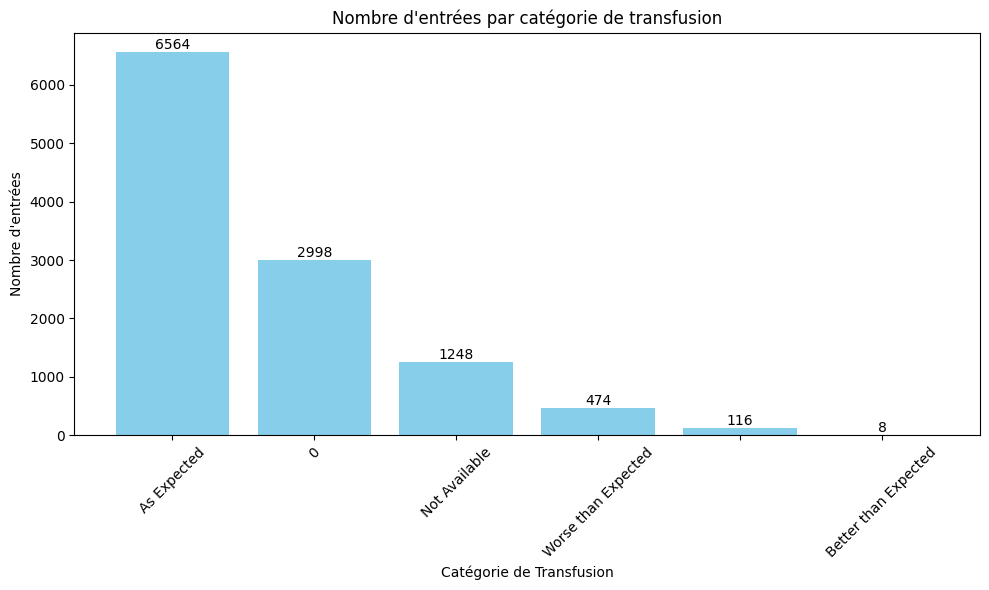

In [169]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and contains the required data.

# Count the entries by category text
category_counts = merged_df['Patient Transfusion category text'].value_counts()
print(category_counts)

# Convert the index to strings to avoid errors
category_counts.index = category_counts.index.astype(str)

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add the numbers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Centered alignment

plt.title('Number of Entries by Transfusion Category')
plt.xlabel('Transfusion Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()  # For better layout
plt.show()


In [170]:
# Calculer la moyenne et la médiane pour les catégories pertinentes
mean_counts = merged_df.groupby('Patient Transfusion category text')['Total Patients'].mean()
median_counts = merged_df.groupby('Patient Transfusion category text')['Total Patients'].median()

print("Meane:\n", mean_counts)
print("Median:\n", median_counts)


Moyenne par catégorie:
 Patient Transfusion category text
0                          0.000000
                           0.000000
As Expected              657.081505
Better than Expected    1991.125000
Not Available            117.773237
Worse than Expected      796.974684
Name: Total Patients, dtype: float64
Médiane par catégorie:
 Patient Transfusion category text
0                          0.0
                           0.0
As Expected              591.0
Better than Expected    1614.0
Not Available            109.0
Worse than Expected      684.0
Name: Total Patients, dtype: float64


Patient Transfusion category text
As Expected             6564
0                       2998
Not Available           1248
Worse than Expected      474
                         116
Better than Expected       8
Name: count, dtype: int64


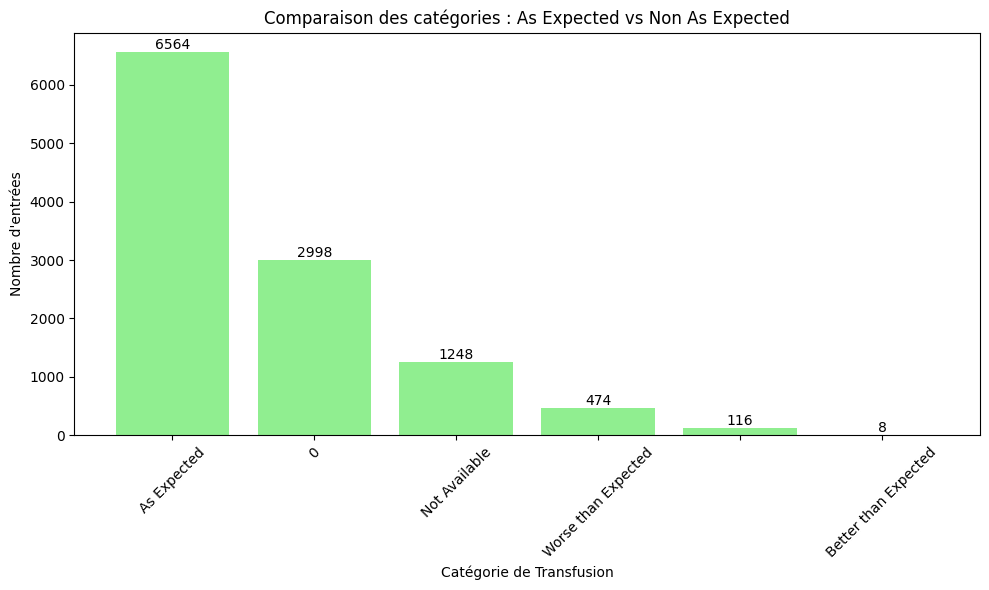

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and contains the required data.

# Count the entries by category text
comparison = merged_df['Patient Transfusion category text'].value_counts()
print(comparison)

# Convert the index to strings to avoid errors
comparison.index = comparison.index.astype(str)

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison.index, comparison.values, color='lightgreen')

# Add the numbers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Centered alignment

plt.title('Comparison of Categories: As Expected vs. Not As Expected')
plt.xlabel('Transfusion Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()  # For better layout
plt.show()


In [174]:
import pandas as pd

# Ensure that the Date column is in datetime format
# Use `errors='coerce'` to handle errors and non-convertible values
merged_df['Certification or Recertification Date'] = pd.to_datetime(
    merged_df['Certification or Recertification Date'], 
    format='%m/%d/%Y', 
    errors='coerce'
)

# Check if any values were converted to NaT (Not a Time) and handle them if necessary
if merged_df['Certification or Recertification Date'].isnull().any():
    print("Some dates could not be converted:")
    print(merged_df[merged_df['Certification or Recertification Date'].isnull()])

# Monthly count of "As Expected" entries
monthly_trends = merged_df[merged_df['Patient Transfusion category text'] == 'As Expected'].groupby(
    merged_df['Certification or Recertification Date'].dt.to_period("M")
).size()

# Display monthly trends
print(monthly_trends)


Certaines dates n'ont pas pu être converties :
       Provider Number  Network_df1  \
0              32302.0         15.0   
2              32315.0         15.0   
3                  0.0          0.0   
5                  0.0          0.0   
6                  0.0          0.0   
...                ...          ...   
11401              0.0          0.0   
11403              0.0          0.0   
11404              0.0          0.0   
11405              0.0          0.0   
11407              0.0          0.0   

                                           Facility Name  \
0                 032302 MARICOPA MEDICAL CTR - DIALYSIS   
2                        032315 GILA RIVER DIALYSIS EAST   
3      032316 BANNER UNIVERSITY MEDICAL CENTER PEDIAT...   
5                      032500 TUCSON WEST DIALYSIS (DVA)   
6                      032501 TUCSON EAST DIALYSIS (DVA)   
...                                                  ...   
11401                                    ZILLAH DIALYSIS   
1140

<Figure size 1000x600 with 0 Axes>

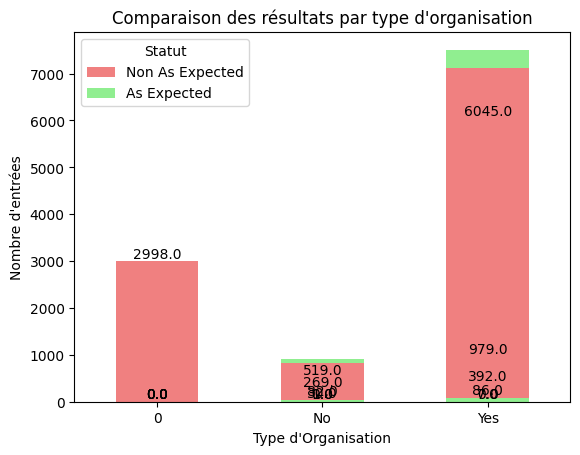

In [175]:
# Compare chains and non-chains
comparison = merged_df.groupby(['Chain Owned', 'Patient Transfusion category text']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
bars = comparison.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Comparison of Results by Organization Type')
plt.xlabel('Type of Organization')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)

# Add numbers on the bars
for p in bars.patches:
    bars.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Status', labels=['Not As Expected', 'As Expected'])
plt.show()


In [200]:
print("kpi 6")

kpi 6


In [182]:
# Supposons que merged_df est déjà créé avec une jointure

# Vérifier le nombre de NaN dans 'PY2020 Payment Reduction Percentage'
nan_count = merged_df['PY2020 Payment Reduction Percentage'].isna().sum()
print(f"Nombre de NaN dans 'PY2020 Payment Reduction Percentage': {nan_count}")

# Si des NaN sont trouvés, examinons les lignes correspondantes
if nan_count > 0:
    # Afficher les lignes avec des NaN dans la colonne
    nan_rows = merged_df[merged_df['PY2020 Payment Reduction Percentage'].isna()]
    print("Lignes avec des NaN dans 'PY2020 Payment Reduction Percentage':")
    print(nan_rows)


Nombre de NaN dans 'PY2020 Payment Reduction Percentage': 8111
Lignes avec des NaN dans 'PY2020 Payment Reduction Percentage':
       Provider Number  Network_df1  \
0              32302.0         15.0   
1              32314.0         15.0   
2              32315.0         15.0   
3                  0.0          0.0   
5                  0.0          0.0   
...                ...          ...   
11401              0.0          0.0   
11403              0.0          0.0   
11404              0.0          0.0   
11405              0.0          0.0   
11407              0.0          0.0   

                                           Facility Name  \
0                 032302 MARICOPA MEDICAL CTR - DIALYSIS   
1      032314 PHOENIX CHILDRENS HOSPITAL- DIALYSIS CE...   
2                        032315 GILA RIVER DIALYSIS EAST   
3      032316 BANNER UNIVERSITY MEDICAL CENTER PEDIAT...   
5                      032500 TUCSON WEST DIALYSIS (DVA)   
...                                         

Taux de réduction de paiement moyen : 0.002294442496493689


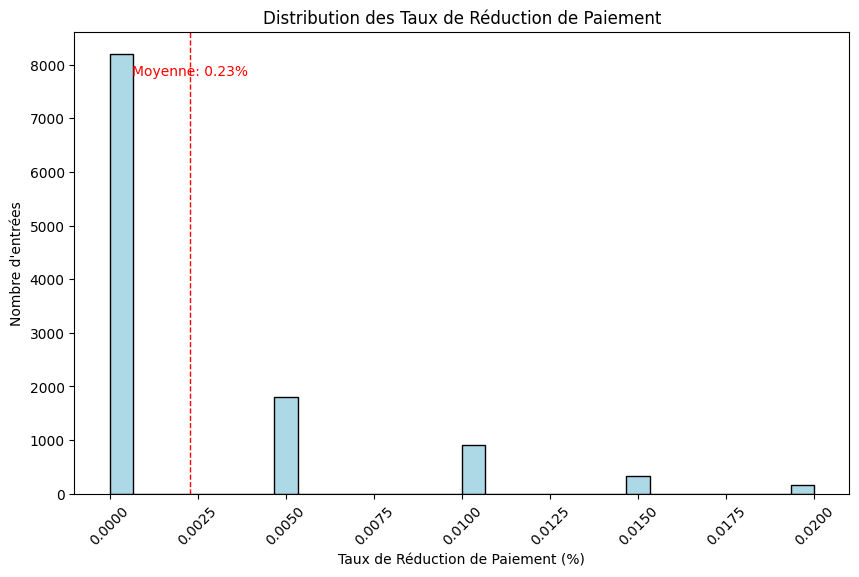

In [196]:
# Calculate the Average Payment Reduction Rate
# Ensure the column is numeric
merged_df['PY2020 Payment Reduction Percentage'] = pd.to_numeric(merged_df['PY2020 Payment Reduction Percentage'], errors='coerce')

# Calculate the mean, ignoring NaN values
average_payment_reduction_rate = merged_df['PY2020 Payment Reduction Percentage'].mean()

# Display the result
print("Average Payment Reduction Rate:", average_payment_reduction_rate)

# Visualize the distribution of Payment Reduction Rates
plt.figure(figsize=(10, 6))
plt.hist(merged_df['PY2020 Payment Reduction Percentage'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.axvline(average_payment_reduction_rate, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Payment Reduction Rates')
plt.xlabel('Payment Reduction Rate (%)')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)

# Add an annotation for the mean
plt.text(average_payment_reduction_rate, plt.ylim()[1]*0.9, f'Mean: {average_payment_reduction_rate:.2%}', 
         color='red', ha='center', va='bottom')

plt.show()


In [185]:
import pandas as pd

# Assume df2 is already loaded with the relevant data

# 1. Data Exploration
print("Preview of DataFrame df2:")
print(df2.head())

# Check the number of NaN values in 'PY2020 Payment Reduction Percentage'
nan_count = df2['PY2020 Payment Reduction Percentage'].isna().sum()
print(f"Number of NaNs in 'PY2020 Payment Reduction Percentage': {nan_count}")

# 2. Clean the Column
# Remove non-numeric characters and convert to float
def clean_percentage(value):
    try:
        # Remove the percentage symbol and convert to float
        return float(value.strip('%')) / 100  # Convert to decimal
    except Exception as e:
        return None  # Return None if conversion fails

# Apply the cleaning function
df2['PY2020 Payment Reduction Percentage'] = df2['PY2020 Payment Reduction Percentage'].apply(clean_percentage)

# 3. Check NaNs after cleaning
nan_count_after_cleaning = df2['PY2020 Payment Reduction Percentage'].isna().sum()
print(f"Number of NaNs after cleaning: {nan_count_after_cleaning}")

# 4. Handle NaN values
# Fill NaNs with 0
df2['PY2020 Payment Reduction Percentage'].fillna(0, inplace=True)

# 5. Calculate the Average
average_payment_reduction_rate = df2['PY2020 Payment Reduction Percentage'].mean()
print("\nAverage Payment Reduction Rate:", average_payment_reduction_rate)

# 6. Interpretation of Results
if average_payment_reduction_rate > 0:
    print(f"The average payment reduction rate is {average_payment_reduction_rate:.2%}, which may indicate negative payment adjustments for facilities.")
else:
    print("No average payment reduction observed, potentially indicating optimal performance or favorable policies.")


Aperçu du DataFrame df2:
                    Facility Name  CMS Certification Number (CCN)  \
0     CHILDRENS HOSPITAL DIALYSIS                           12306   
1                FMC CAPITOL CITY                           12500   
2                GADSDEN DIALYSIS                           12501   
3  TUSCALOOSA UNIVERSITY DIALYSIS                           12502   
4                  PCD MONTGOMERY                           12505   

  Alternate CCN                  Address        City State  Zip Code  Network  \
0         13300   1600 7TH AVENUE SOUTH   BIRMINGHAM    AL     35233        8   
1             -    255 S JACKSON STREET   MONTGOMERY    AL     36104        8   
2             -  409 SOUTH FIRST STREET      GADSDEN    AL     35901        8   
3             -         220 15TH STREET   TUSCALOOSA    AL     35401        8   
4             -      1001 FOREST AVENUE   MONTGOMERY    AL     36106        8   

  VAT Catheter Measure Score  \
0                   No Score   
1        

C:\Users\KBH9801\AppData\Local\Temp\ipykernel_24052\3516985645.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['PY2020 Payment Reduction Percentage'].fillna(0, inplace=True)


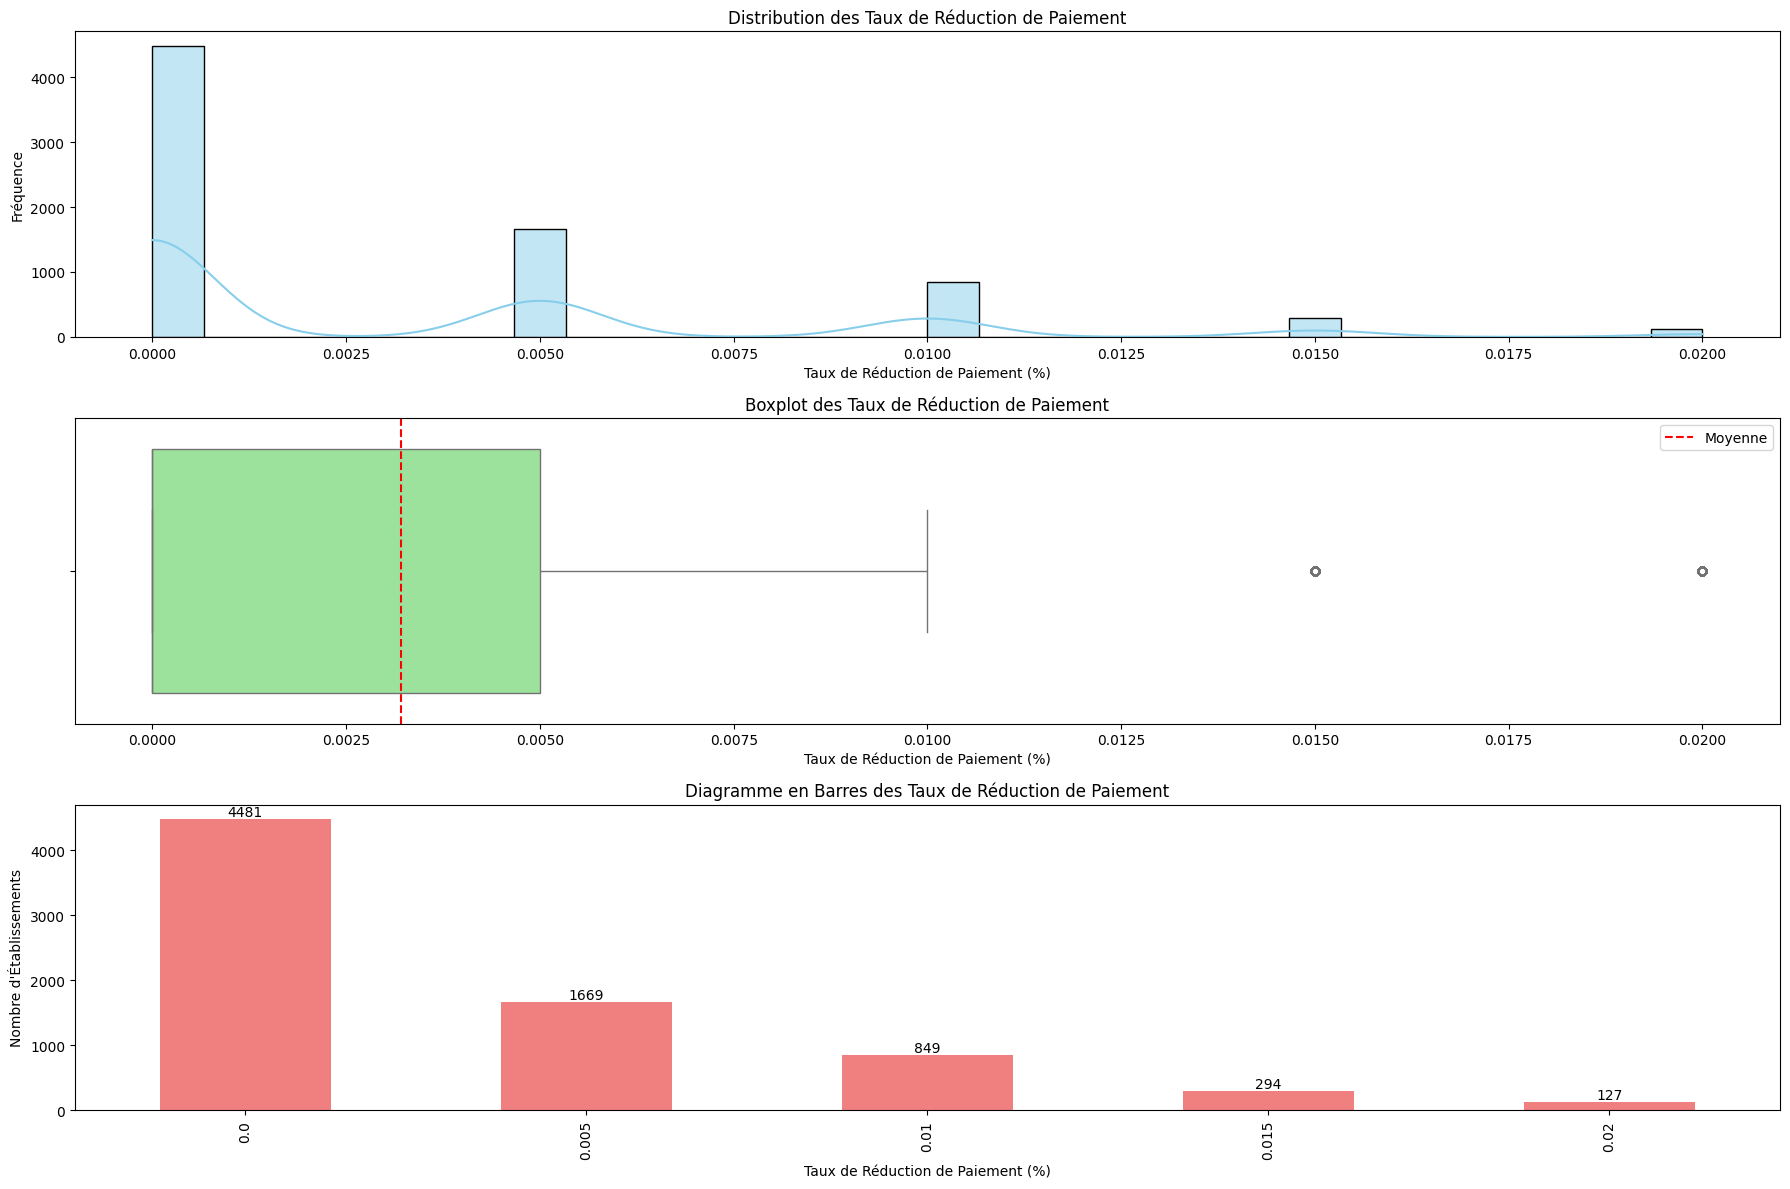

In [187]:
plt.figure(figsize=(18, 12))

# Histogram
plt.subplot(3, 1, 1)
sns.histplot(df2['PY2020 Payment Reduction Percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Payment Reduction Rates')
plt.xlabel('Payment Reduction Rate (%)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(3, 1, 2)
sns.boxplot(x=df2['PY2020 Payment Reduction Percentage'], color='lightgreen')
plt.title('Boxplot of Payment Reduction Rates')
plt.xlabel('Payment Reduction Rate (%)')

# Add the mean on the boxplot
plt.axvline(average_payment_reduction_rate, color='red', linestyle='--', label='Mean')
plt.legend()

# Bar chart for unique values
plt.subplot(3, 1, 3)
bar_data = df2['PY2020 Payment Reduction Percentage'].value_counts().sort_index()
bars = bar_data.plot(kind='bar', color='lightcoral')

# Add the numbers on the bars
for index, value in enumerate(bar_data):
    bars.text(index, value, str(value), ha='center', va='bottom')

plt.title('Bar Chart of Payment Reduction Rates')
plt.xlabel('Payment Reduction Rate (%)')
plt.ylabel('Number of Facilities')

# Display the charts
plt.tight_layout()
plt.show()
